In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
np.random.seed(42)

%matplotlib inline

In [2]:
beauty_df = pd.read_csv("./ARM_Data_extra/examples/beauty/ProfEvaltnsBeautyPublic.csv")

In [3]:
beauty_df.describe()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,...,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,0.546436,45.434125,0.138229,48.365011,5.213823,3.963283,5.019438,4.751620,3.412527,4.146868,...,0.060475,0.058315,74.427788,4.174730,55.177106,0.779698,0.168467,1.842626,0.282413,-0.370763
std,0.498377,27.508902,0.345513,9.802742,2.018224,1.873936,1.934437,1.575266,1.637102,2.110586,...,0.238623,0.234592,16.756311,0.543865,75.072800,0.414899,0.374685,1.261574,0.480691,0.425478
min,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,10.416670,2.300000,8.000000,0.000000,0.000000,0.085029,0.000000,-1.538840
25%,0.000000,20.000000,0.000000,42.000000,4.000000,2.000000,4.000000,4.000000,2.000000,3.000000,...,0.000000,0.000000,62.696165,3.800000,19.000000,1.000000,0.000000,0.828371,0.000000,-0.744618
50%,1.000000,44.000000,0.000000,48.000000,5.000000,4.000000,5.000000,5.000000,3.000000,4.000000,...,0.000000,0.000000,76.923080,4.300000,29.000000,1.000000,0.000000,1.565791,0.000000,-0.156363
75%,1.000000,70.500000,0.000000,57.000000,6.000000,5.000000,7.000000,6.000000,5.000000,5.000000,...,0.000000,0.000000,87.249170,4.600000,60.000000,1.000000,0.000000,2.682287,0.457254,0.000000
max,1.000000,94.000000,1.000000,73.000000,10.000000,8.000000,9.000000,9.000000,7.000000,9.000000,...,1.000000,1.000000,100.000000,5.000000,581.000000,1.000000,1.000000,5.791667,1.881670,0.000000


In [4]:
beauty_df.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [5]:
mdl_5a = sm.OLS(exog = sm.add_constant(beauty_df[['btystdave']]), endog=beauty_df.courseevaluation).fit()
mdl_5a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           4.25e-05
Time:                        11:09:00   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

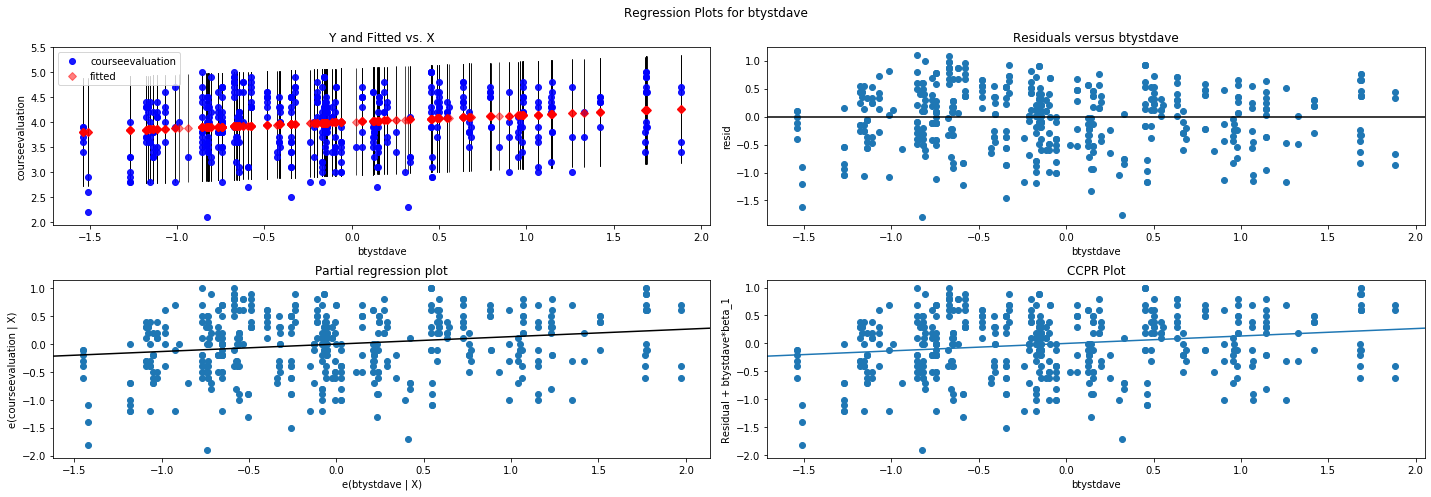

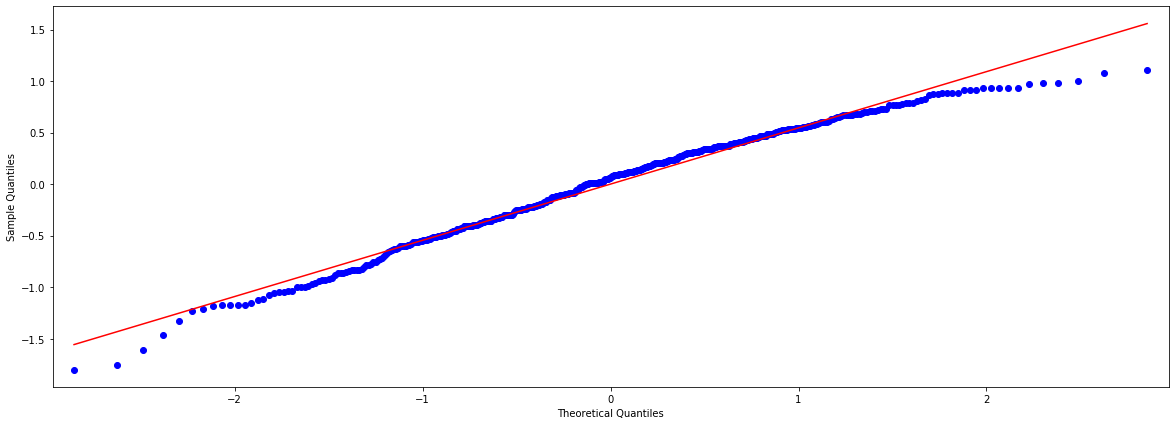

In [6]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,7))
    sm.graphics.plot_regress_exog(mdl_5a, "btystdave");
    sm.qqplot(mdl_5a.resid, line='r');

Next exercise is pretty open-ended with a goal of trying out different variables. Instead I wanted to try a variable selection approach described [here](https://planspace.org/20150423-forward_selection_with_statsmodels/).

In [7]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [8]:
elimd_model = forward_selected(beauty_df, "courseevaluation")

In [9]:
elimd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 04 Mar 2020   Prob (F-statistic):          8.81e-201
Time:                        11:09:37   Log-Likelihood:                 151.87
No. Observations:                 463   AIC:                            -249.7
Df Residuals:                     436   BIC:                            -138.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.812e+05    1.1e+05     -2.553      0.011   -4.98e+05   -6.47e+04
profevaluation        0.9298      0.017     54.246      0.000       0.896       0.964
percentevaluating     0.0013      0.001      2.298      0.022       0.000       0.002
age                   0.0035      0.001      3.398      0.001       0.001       0.006
profnumber            0.0007      0.000      2.069      0.039    3.66e-05       0.001
nonenglish           -0.1781      0.038     -4.679      0.000      -0.253      -0.103
class12              -0.2612      0.108     -2.427      0.016      -0.473      -0.050
class27               0.3447      0.130      2.650      0.008       0.089       0.600
class14               0.3115      0.109      2.849      0.005       0.097       0.526
class18               0.3083      0.094      3.266      0.001       0.123       0.494
class19              -0.1449      0.080     -1.815      0.070      -0.302       0.012
beautym2upper         0.0127      0.008      1.668      0.096      -0.002       0.028
class8                0.2985      0.131      2.285      0.023       0.042       0.555
onecredit             0.0650      0.039      1.674      0.095      -0.011       0.141
class26               0.2167      0.108      2.009      0.045       0.005       0.429
class3               -0.1037      0.069     -1.504      0.133      -0.239       0.032
class17               0.1553      0.073      2.136      0.033       0.012       0.298
class29              -0.1620      0.130     -1.245      0.214      -0.418       0.094
beautyfupperdiv       0.0150      0.007      2.044      0.042       0.001       0.029
btystdml             -0.0281      0.013     -2.141      0.033      -0.054      -0.002
female               -0.0354      0.019     -1.853      0.064      -0.073       0.002
class5                0.1384      0.093      1.495      0.136      -0.044       0.320
multipleclass        -0.0358      0.022     -1.665      0.097      -0.078       0.006
class2                0.1363      0.131      1.043      0.298      -0.121       0.393
beautymupperdiv    6.355e+04   2.49e+04      2.553      0.011    1.46e+04    1.12e+05
btystdmu          -1.384e+05   5.42e+04     -2.553      0.011   -2.45e+05   -3.18e+04
class23               0.0996      0.084      1.183      0.237      -0.066       0.265
==============================================================================
Omnibus:                       88.713   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.914
Skew:                          -0.934   Prob(JB):                     5.92e-52
Kurtosis:                       5.956   Cond. No.                     1.53e+09
==============================================================================

Warnings:
[1] Standard Error

In [10]:
elimd_model.model.formula

'courseevaluation ~ profevaluation + percentevaluating + age + profnumber + nonenglish + class12 + class27 + class14 + class18 + class19 + beautym2upper + class8 + onecredit + class26 + class3 + class17 + class29 + beautyfupperdiv + btystdml + female + class5 + multipleclass + class2 + beautymupperdiv + btystdmu + class23 + 1'

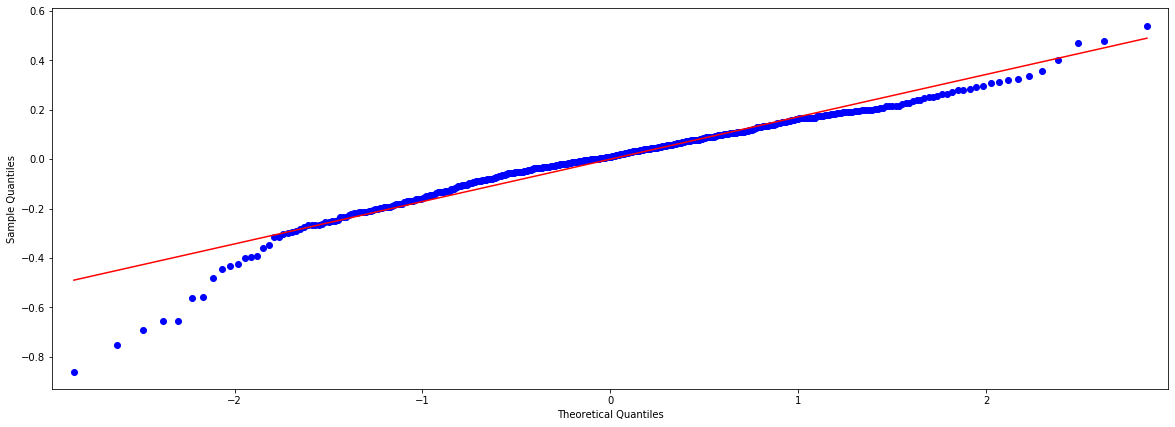

In [11]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,7))
    sm.qqplot(elimd_model.resid, line='r');

Worked nicely, especially in comparison to the original model with one variable ($R^2$ went up to 0.901 from 0.036)